In [800]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
%matplotlib inline

## Data Wrangling

In [801]:
arabica_subset = pd.read_csv('./data/arabica_temp_subset.csv').drop(['Unnamed: 0'], axis=1)

In [802]:
arabica_subset.head()

,quality_score,Country of Origin,Aroma,Flavor,Aftertaste,Acidity,Processing Method,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Category Two Defects,Temperature (F)
0,88.83,Brazil,8.58,8.42,8.42,8.50,Natural / Dry,8.25,8.33,10.0,10.0,10.0,8.33,0.11,0,1,77.908733
1,86.92,Brazil,8.50,8.50,8.00,8.00,Natural / Dry,8.00,8.00,10.0,10.0,10.0,7.92,0.12,0,2,77.908733
2,86.42,Brazil,8.50,8.17,8.00,7.75,Natural / Dry,8.00,8.00,10.0,10.0,10.0,8.00,0.12,0,2,77.908733
3,86.17,Brazil,8.17,7.92,7.92,7.75,NaN,8.33,8.00,10.0,10.0,10.0,8.08,0.08,0,2,77.908733
4,86.17,Brazil,8.42,7.92,8.00,7.75,NaN,7.92,8.00,10.0,10.0,10.0,8.17,0.01,0,3,77.908733


In [803]:
arabica_subset.columns

Index(['quality_score', 'Country of Origin', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Processing Method', 'Body', 'Balance', 'Uniformity',
       'Clean Cup', 'Sweetness', 'Cupper Points', 'Moisture',
       'Category One Defects', 'Category Two Defects', 'Temperature (F)'],
      dtype='object')

In [804]:
arabica_sub = arabica_subset[['quality_score', 'Country of Origin', 'Flavor', 'Aroma', 'Processing Method', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean Cup', 'Sweetness', 'Cupper Points', 'Category One Defects', 'Category Two Defects']]

In [805]:
arabica_sub.head()

,quality_score,Country of Origin,Flavor,Aroma,Processing Method,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Category One Defects,Category Two Defects
0,88.83,Brazil,8.42,8.58,Natural / Dry,8.42,8.50,8.25,8.33,10.0,10.0,10.0,8.33,0,1
1,86.92,Brazil,8.50,8.50,Natural / Dry,8.00,8.00,8.00,8.00,10.0,10.0,10.0,7.92,0,2
2,86.42,Brazil,8.17,8.50,Natural / Dry,8.00,7.75,8.00,8.00,10.0,10.0,10.0,8.00,0,2
3,86.17,Brazil,7.92,8.17,NaN,7.92,7.75,8.33,8.00,10.0,10.0,10.0,8.08,0,2
4,86.17,Brazil,7.92,8.42,NaN,8.00,7.75,7.92,8.00,10.0,10.0,10.0,8.17,0,3


In [806]:
arabica_sub.describe()

,quality_score,Flavor,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Category One Defects,Category Two Defects
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,82.086212,7.516913,7.562614,7.396822,7.532614,7.516570,7.516349,9.825899,9.825625,9.895724,7.496723,0.426067,3.589177
std,3.675542,0.402017,0.380976,0.406202,0.381879,0.361512,0.408316,0.621552,0.817449,0.596925,0.476228,1.831754,5.349249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.170000,7.330000,7.420000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,0.000000,0.000000
50%,82.500000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,0.000000,2.000000
75%,83.670000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,0.000000,4.000000
max,90.580000,8.830000,8.750000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,31.000000,55.000000


In [807]:
# sort values to find outlier
arabica_sub = arabica_sub.sort_values('quality_score').reset_index(drop=True)

In [808]:
# drop outlier
arabica_sub = arabica_sub.drop([0], axis=0)

In [809]:
arabica_sub.columns

Index(['quality_score', 'Country of Origin', 'Flavor', 'Aroma',
       'Processing Method', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Cupper Points',
       'Category One Defects', 'Category Two Defects'],
      dtype='object')

In [810]:
arabica_sub.describe()

,quality_score,Flavor,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Category One Defects,Category Two Defects
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000
mean,82.148825,7.522647,7.568383,7.402464,7.538360,7.522304,7.522082,9.833394,9.83312,9.903272,7.502441,0.426392,3.590389
std,2.893505,0.344348,0.318687,0.351181,0.320307,0.296022,0.351696,0.559343,0.77135,0.530832,0.428989,1.832415,5.351110
min,43.130000,6.000000,5.080000,6.170000,5.250000,5.250000,6.000000,0.000000,0.00000,0.000000,5.170000,0.000000,0.000000
25%,81.170000,7.330000,7.420000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,0.000000,0.000000
50%,82.500000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,0.000000,2.000000
75%,83.670000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,0.000000,4.000000
max,90.580000,8.830000,8.750000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,31.000000,55.000000


In [811]:
arabica_sub['Processing Method'].value_counts()

Washed / Wet                 812
Natural / Dry                251
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: Processing Method, dtype: int64

In [812]:
# clean each value
arabica_sub['Processing Method'] = arabica_sub['Processing Method'].str.replace(' / ', '_')

In [813]:
# see how many NaN values are in the column
arabica_sub['Processing Method'].isnull().value_counts()

False    1159
True      152
Name: Processing Method, dtype: int64

In [814]:
# fill NaN values with Other since they are unknown
arabica_sub['Processing Method'] = arabica_sub['Processing Method'].fillna('Other')

In [815]:
# review value counts again - notice the change from 26 to 178 after the converted NaN values were added
arabica_sub['Processing Method'].value_counts()

Washed_Wet                 812
Natural_Dry                251
Other                      178
Semi-washed_Semi-pulped     56
Pulped natural_honey        14
Name: Processing Method, dtype: int64

In [816]:
arabica_sub['Country of Origin'].value_counts()

Mexico                         236
Colombia                       183
Guatemala                      181
Brazil                         132
Taiwan                          75
United States (Hawaii)          73
Honduras                        52
Costa Rica                      51
Ethiopia                        45
Tanzania                        40
Thailand                        32
Nicaragua                       26
Uganda                          26
Kenya                           25
El Salvador                     21
Indonesia                       20
China                           16
Malawi                          11
Peru                            10
United States                    8
Myanmar                          8
Vietnam                          7
Haiti                            6
Philippines                      5
United States (Puerto Rico)      4
Panama                           4
Laos                             3
Burundi                          2
Mauritius           

In [817]:
# rename United States (Hawaii) to Hawaii
arabica_sub.loc[arabica_sub['Country of Origin']=='United States (Hawaii)', 'Country of Origin'] = 'Hawaii'

In [818]:
# rename United States (Puerto Rico) to Puerto Rico
arabica_sub.loc[arabica_sub['Country of Origin']=='United States (Puerto Rico)', 'Country of Origin'] = 'Puerto_Rico'

In [819]:
# rename Cote d'Ivoire to Cote_dIvoire
arabica_sub.loc[arabica_sub['Country of Origin']=="Cote d'Ivoire", 'Country of Origin'] = 'Cote_dIvoire'

In [820]:
# replace whitespace with underscores
arabica_sub['Country of Origin'] = arabica_sub['Country of Origin'].str.replace(' ', '_')

In [821]:
arabica_sub['Country of Origin'].value_counts()

Mexico              236
Colombia            183
Guatemala           181
Brazil              132
Taiwan               75
Hawaii               73
Honduras             52
Costa_Rica           51
Ethiopia             45
Tanzania             40
Thailand             32
Uganda               26
Nicaragua            26
Kenya                25
El_Salvador          21
Indonesia            20
China                16
Malawi               11
Peru                 10
Myanmar               8
United_States         8
Vietnam               7
Haiti                 6
Philippines           5
Panama                4
Puerto_Rico           4
Laos                  3
Burundi               2
India                 1
Columbia              1
Japan                 1
Cote_dIvoire          1
Zambia                1
Ecuador               1
Mauritius             1
Rwanda                1
Papua_New_Guinea      1
Name: Country of Origin, dtype: int64

In [822]:
# function to scale values
def scale(value):
    return value*10

In [823]:
# scale values to match dependent variable using scale function
arabica_sub['Flavor'] = arabica_sub['Flavor'].apply(lambda v: scale(v))
arabica_sub['Aroma'] = arabica_sub['Aroma'].apply(lambda v: scale(v))
arabica_sub['Cupper Points'] = arabica_sub['Cupper Points'].apply(lambda v: scale(v))
arabica_sub['Aftertaste'] = arabica_sub['Aftertaste'].apply(lambda v: scale(v))
arabica_sub['Acidity'] = arabica_sub['Acidity'].apply(lambda v: scale(v))
arabica_sub['Body'] = arabica_sub['Body'].apply(lambda v: scale(v))
arabica_sub['Balance'] = arabica_sub['Balance'].apply(lambda v: scale(v))
arabica_sub['Uniformity'] = arabica_sub['Uniformity'].apply(lambda v: scale(v))
arabica_sub['Clean Cup'] = arabica_sub['Clean Cup'].apply(lambda v: scale(v))
arabica_sub['Sweetness'] = arabica_sub['Sweetness'].apply(lambda v: scale(v))

In [824]:
arabica_sub.head()

,quality_score,Country of Origin,Flavor,Aroma,Processing Method,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Category One Defects,Category Two Defects
1,43.13,Ethiopia,60.0,60.0,Other,62.5,68.8,60.0,60.0,0.0,0.0,0.0,60.0,0,0
2,59.83,Guatemala,66.7,75.0,Washed_Wet,66.7,76.7,73.3,66.7,80.0,13.3,13.3,66.7,0,4
3,63.08,Nicaragua,65.8,72.5,Other,63.3,62.5,64.2,60.8,60.0,60.0,60.0,61.7,1,5
4,67.92,Haiti,65.8,67.5,Natural_Dry,64.2,66.7,70.8,66.7,93.3,60.0,60.0,64.2,8,16
5,68.33,Mexico,68.3,70.8,Washed_Wet,62.5,74.2,72.5,67.5,100.0,0.0,100.0,67.5,0,20


## Creating Training and Testing Samples

In [825]:
# create training sample
train_amt = int(0.90*len(arabica_sub))
train_df = arabica_sub.sample(train_amt)

In [826]:
# create testing sample
test_amt = len(arabica_sub) - train_amt
test_df = arabica_sub.sample(test_amt)

In [827]:
# fix column name to reflect the train data column name
test_df.rename(columns={'Category One Defects': 'Category_One_Defects', 'Category Two Defects': 'Category_Two_Defects'}, inplace=True)

## Correlation Analysis

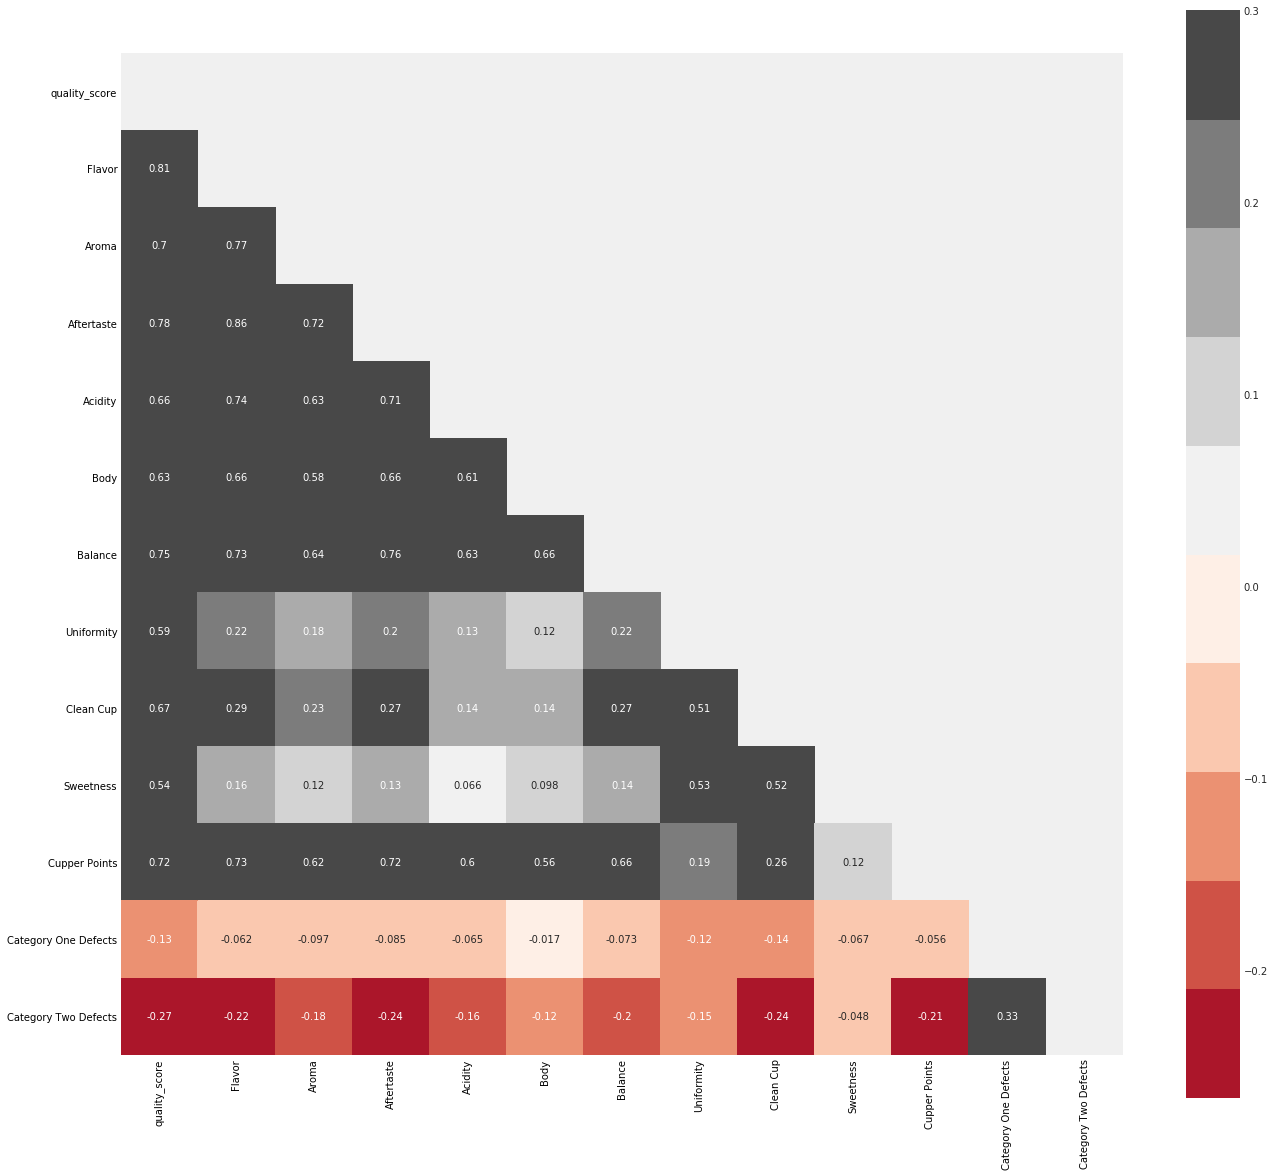

In [828]:
# graph correlation matrix to see what pairs are correlated and how much they are correlated
plt.subplots(figsize=(20, 20))
cmap = sns.color_palette("RdGy", 10)
mask = np.zeros_like(train_df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(train_df.corr(), mask=mask, cmap=cmap, vmax=0.3, square=True, annot=True)
plt.show()

In [829]:
train_df1 = train_df[['quality_score', 'Aroma', 'Flavor', 'Cupper Points', 'Category One Defects', 'Category Two Defects']]

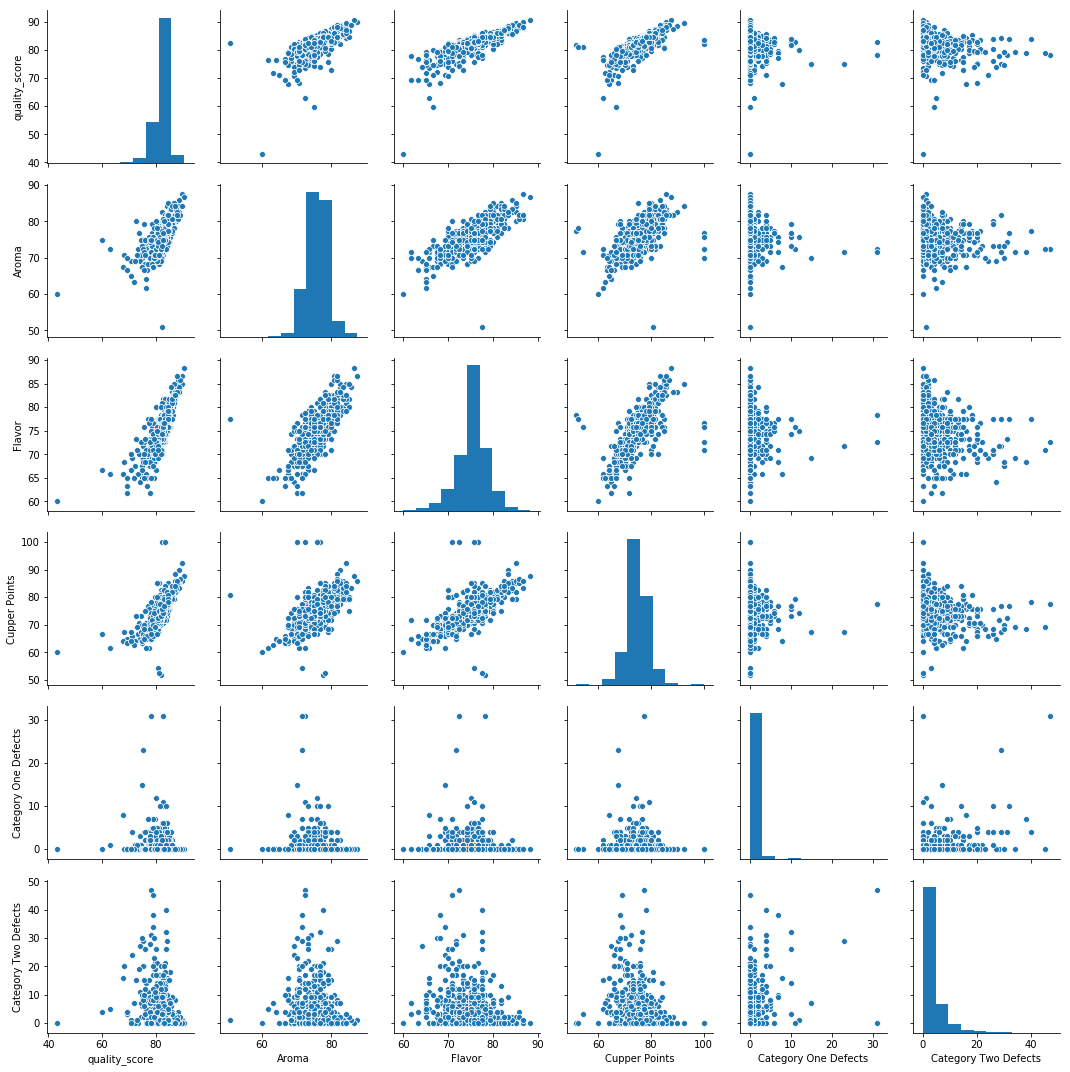

In [224]:
sns.pairplot(train_df1)

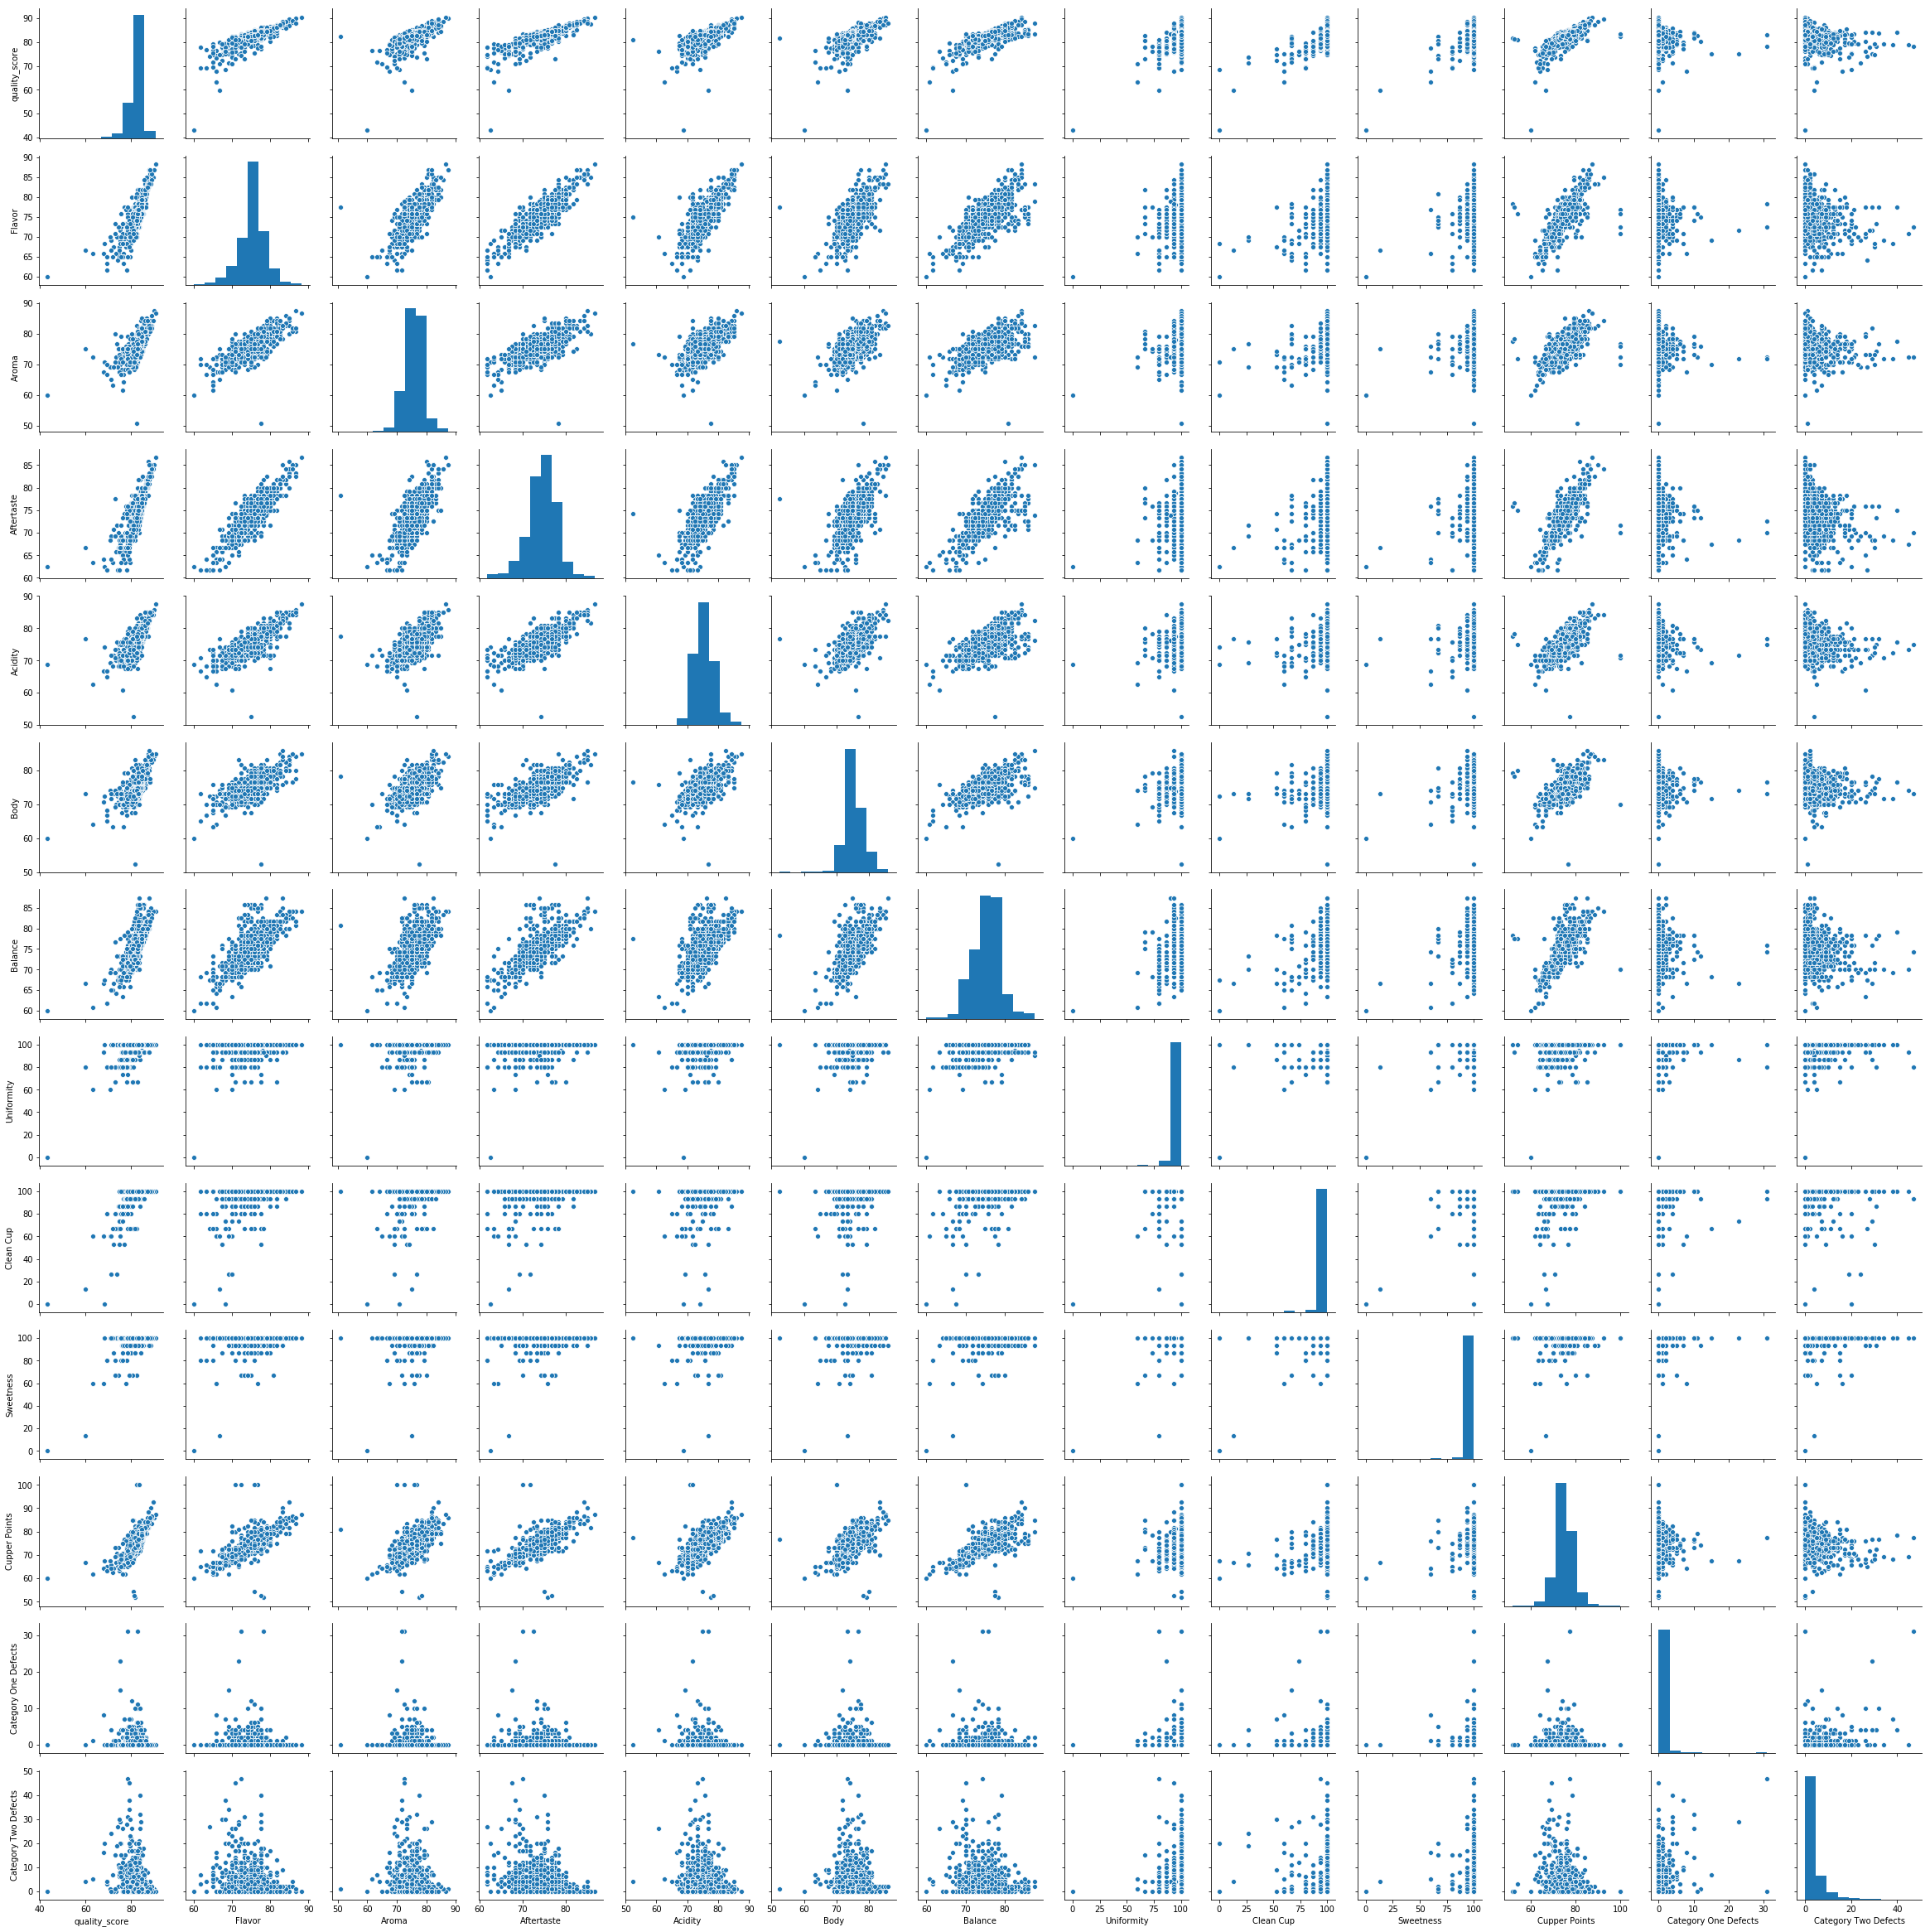

In [225]:
# looking at the relationship between pairs
sns.pairplot(train_df)

## Dummy Variables

In [830]:
defects1_dummy = pd.get_dummies(train_df['Category One Defects'], prefix='Category_One_Defects')

In [831]:
defects1_dummies = pd.concat([train_df, defects1_dummy], axis = 1)

In [832]:
defects2_dummy = pd.get_dummies(train_df['Category Two Defects'], prefix='Category_Two_Defects')

In [833]:
defects2_dummies = pd.concat([defects1_dummies, defects2_dummy], axis = 1)

In [834]:
processing_dummy = pd.get_dummies(train_df['Processing Method'], prefix='Processing')

In [835]:
processing_dummies = pd.concat([defects2_dummies, processing_dummy], axis = 1)

In [836]:
processing_dummies.columns

Index(['quality_score', 'Country of Origin', 'Flavor', 'Aroma',
       'Processing Method', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Cupper Points',
       'Category One Defects', 'Category Two Defects',
       'Category_One_Defects_0', 'Category_One_Defects_1',
       'Category_One_Defects_2', 'Category_One_Defects_3',
       'Category_One_Defects_4', 'Category_One_Defects_5',
       'Category_One_Defects_6', 'Category_One_Defects_7',
       'Category_One_Defects_8', 'Category_One_Defects_9',
       'Category_One_Defects_10', 'Category_One_Defects_11',
       'Category_One_Defects_12', 'Category_One_Defects_15',
       'Category_One_Defects_23', 'Category_One_Defects_31',
       'Category_Two_Defects_0', 'Category_Two_Defects_1',
       'Category_Two_Defects_2', 'Category_Two_Defects_3',
       'Category_Two_Defects_4', 'Category_Two_Defects_5',
       'Category_Two_Defects_6', 'Category_Two_Defects_7',
       'Category_Two_Defects_8'

In [837]:
processing_dummies['Processing_Pulped_natural_honey'] = processing_dummies['Processing_Pulped natural_honey']

In [838]:
processing_dummies['Processing_Semiwashed_Semipulped'] = processing_dummies['Processing_Semi-washed_Semi-pulped']

In [839]:
processing_dummies = processing_dummies.drop(['Processing_Pulped natural_honey', 'Processing_Semi-washed_Semi-pulped'], axis=1)

In [840]:
processing_dummies['Clean_Cup'] = processing_dummies['Clean Cup']

In [841]:
processing_dummies = processing_dummies.drop(['Clean Cup'], axis=1)

In [842]:
country_dummy = pd.get_dummies(arabica_sub['Country of Origin'], prefix='Country')

In [843]:
country_dummies = pd.concat([processing_dummies, country_dummy], axis = 1)

### Interaction Variables

In [844]:
country_dummies.head()

,quality_score,Country of Origin,Flavor,Aroma,Processing Method,Aftertaste,Acidity,Body,Balance,Uniformity,...,Country_Philippines,Country_Puerto_Rico,Country_Rwanda,Country_Taiwan,Country_Tanzania,Country_Thailand,Country_Uganda,Country_United_States,Country_Vietnam,Country_Zambia
1,43.13,Ethiopia,60.0,60.0,Other,62.5,68.8,60.0,60.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,59.83,Guatemala,66.7,75.0,Washed_Wet,66.7,76.7,73.3,66.7,80.0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,67.92,Haiti,65.8,67.5,Natural_Dry,64.2,66.7,70.8,66.7,93.3,...,0,0,0,0,0,0,0,0,0,0
5,68.33,Mexico,68.3,70.8,Washed_Wet,62.5,74.2,72.5,67.5,100.0,...,0,0,0,0,0,0,0,0,0,0


In [845]:
country_dummies['AromaxFlavor'] = country_dummies['Aroma']*country_dummies['Flavor']

In [846]:
country_dummies['AromaxCupper'] = country_dummies['Aroma']*country_dummies['Cupper Points']

In [847]:
country_dummies['FlavorxCupper'] = country_dummies['Flavor']*country_dummies['Cupper Points']

In [848]:
country_dummies['FlavorxAftertaste'] = country_dummies['Flavor']*country_dummies['Aftertaste']

In [849]:
country_dummies['FlavorxAcidity'] = country_dummies['Flavor']*country_dummies['Acidity']

## Creating a Model

In [850]:
# copy dataframe to a separate variable
coffee_df = country_dummies.copy()

In [851]:
# make a new column for Cupper Points so there is no space between the words in the column title
coffee_df['Cupper_Points'] = coffee_df['Cupper Points']

In [852]:
# drop the Cupper Points column
coffee_df= coffee_df.drop(['Cupper Points'], axis=1)

In [853]:
coffee_df.head()

,quality_score,Country of Origin,Flavor,Aroma,Processing Method,Aftertaste,Acidity,Body,Balance,Uniformity,...,Country_Uganda,Country_United_States,Country_Vietnam,Country_Zambia,AromaxFlavor,AromaxCupper,FlavorxCupper,FlavorxAftertaste,FlavorxAcidity,Cupper_Points
1,43.13,Ethiopia,60.0,60.0,Other,62.5,68.8,60.0,60.0,0.0,...,0,0,0,0,3600.00,3600.0,3600.00,3750.00,4128.00,60.0
2,59.83,Guatemala,66.7,75.0,Washed_Wet,66.7,76.7,73.3,66.7,80.0,...,0,0,0,0,5002.50,5002.5,4448.89,4448.89,5115.89,66.7
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,67.92,Haiti,65.8,67.5,Natural_Dry,64.2,66.7,70.8,66.7,93.3,...,0,0,0,0,4441.50,4333.5,4224.36,4224.36,4388.86,64.2
5,68.33,Mexico,68.3,70.8,Washed_Wet,62.5,74.2,72.5,67.5,100.0,...,0,0,0,0,4835.64,4779.0,4610.25,4268.75,5067.86,67.5


### Quality Score ~ Aroma

In [854]:
# set up the formula
aroma1 = "quality_score~Aroma"

In [855]:
# set up the model using StatsModel
aroma_model = ols(formula=aroma1, data=coffee_df).fit()

In [856]:
aroma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          9.64e-178
Time:                        13:20:34   Log-Likelihood:                -2520.8
No. Observations:                1179   AIC:                             5046.
Df Residuals:                    1177   BIC:                             5056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.0559      1.441     22.941      0.000      30.229      35.883
Aroma          0.6485      0.019     34.090      0.000       0.611       0.686
==============================================================================
Omnibus:                     1184.284   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           109530.125
Skew:                          -4.502   Prob(JB):                         0.00
Kurtosis:                      49.352   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Quality Score ~ Aroma + Flavor

In [857]:
# copy columns of interest into a separate dataframe
aroma_flavor = coffee_df[['quality_score', 'Aroma', 'Flavor', 'AromaxFlavor']].copy()

In [858]:
# set up the formula
aromaflavor = "quality_score~Aroma+Flavor"

In [859]:
# set up the model using StatsModel
aromaflavor_model = ols(formula=aromaflavor, data=coffee_df).fit()

In [860]:
aromaflavor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     1178.
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          1.71e-281
Time:                        13:20:36   Log-Likelihood:                -2277.6
No. Observations:                1179   AIC:                             4561.
Df Residuals:                    1176   BIC:                             4576.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.6974      1.201     22.227      0.000      24.341      29.054
Aroma          0.1941      0.024      8.036      0.000       0.147       0.241
Flavor         0.5418      0.022     24.510      0.000       0.498       0.585
==============================================================================
Omnibus:                     1438.924   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           300051.077
Skew:                          -6.029   Prob(JB):                         0.00
Kurtosis:                      80.217   Cond. No.                     2.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [861]:
# set up the formula
aromaxflavor = "quality_score~Aroma+Flavor+AromaxFlavor"

In [862]:
# set up the model using StatsModel
aromaxflavor_model = ols(formula=aromaxflavor, data=coffee_df).fit()

In [863]:
aromaxflavor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     888.9
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          1.24e-301
Time:                        13:20:39   Log-Likelihood:                -2227.3
No. Observations:                1179   AIC:                             4463.
Df Residuals:                    1175   BIC:                             4483.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -117.7116     14.174     -8.305      0.000    -145.521     -89.902
Aroma            2.1183      0.190     11.169      0.000       1.746       2.490
Flavor           2.4674      0.190     13.016      0.000       2.095       2.839
AromaxFlavor    -0.0256      0.003    -10.222      0.000      -0.031      -0.021
==============================================================================
Omnibus:                     1165.186   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110999.943
Skew:                          -4.362   Prob(JB):                         0.00
Kurtosis:                      49.727   Cond. No.                     1.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Quality Score ~ Aroma + Cupper Points

In [864]:
# set up the formula
aromacupper = "quality_score~Aroma+Cupper_Points"

In [865]:
# set up the model using StatsModel
aromacupper_model = ols(formula=aromacupper, data=coffee_df).fit()

In [866]:
aromacupper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     997.4
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          5.23e-254
Time:                        13:20:41   Log-Likelihood:                -2341.0
No. Observations:                1179   AIC:                             4688.
Df Residuals:                    1176   BIC:                             4703.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.9707      1.247     24.039      0.000      27.525      32.417
Aroma             0.3823      0.021     18.311      0.000       0.341       0.423
Cupper_Points     0.3097      0.015     20.481      0.000       0.280       0.339
==============================================================================
Omnibus:                     1424.098   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           266062.472
Skew:                          -5.960   Prob(JB):                         0.00
Kurtosis:                      75.622   Cond. No.                     2.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [867]:
# set up the formula
aromaxcupper = aromacupper = "quality_score~Aroma+Cupper_Points+AromaxCupper"

In [868]:
# set up the model using StatsModel
aromaxcupper_model = ols(formula=aromaxcupper, data=coffee_df).fit()

In [869]:
aromaxcupper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     727.6
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          2.76e-267
Time:                        13:20:43   Log-Likelihood:                -2306.7
No. Observations:                1179   AIC:                             4621.
Df Residuals:                    1175   BIC:                             4642.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -81.1748     13.306     -6.101      0.000    -107.281     -55.069
Aroma             1.8635      0.178     10.484      0.000       1.515       2.212
Cupper_Points     1.7979      0.178     10.099      0.000       1.449       2.147
AromaxCupper     -0.0198      0.002     -8.388      0.000      -0.024      -0.015
==============================================================================
Omnibus:                     1252.963   Durbin-Watson:                   1.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137361.261
Skew:                          -4.904   Prob(JB):                         0.00
Kurtosis:                      54.961   Cond. No.                     1.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Quality Score ~ Flavor + Cupper Points

In [870]:
# set up the formula
flavorcupper = "quality_score~Flavor+Cupper_Points"

In [871]:
# set up the model using StatsModel
flavorcupper_model = ols(formula=flavorcupper, data=coffee_df).fit()

In [872]:
flavorcupper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1289.
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          3.51e-297
Time:                        13:20:44   Log-Likelihood:                -2241.3
No. Observations:                1179   AIC:                             4489.
Df Residuals:                    1176   BIC:                             4504.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        30.1157      1.038     29.014      0.000      28.079      32.152
Flavor            0.5008      0.020     24.772      0.000       0.461       0.540
Cupper_Points     0.1914      0.016     11.966      0.000       0.160       0.223
==============================================================================
Omnibus:                     1539.530   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432535.006
Skew:                          -6.736   Prob(JB):                         0.00
Kurtosis:                      95.862   Cond. No.                     2.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [873]:
# set up the formula
flavorxcupper = "quality_score~Flavor+Cupper_Points+FlavorxCupper"

In [874]:
# set up the model using StatsModel
flavorxcupper_model = ols(formula=flavorxcupper, data=coffee_df).fit()

In [875]:
flavorxcupper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     991.2
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          3.16e-321
Time:                        13:20:46   Log-Likelihood:                -2182.0
No. Observations:                1179   AIC:                             4372.
Df Residuals:                    1175   BIC:                             4392.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -88.4112     10.676     -8.282      0.000    -109.356     -67.466
Flavor            2.0838      0.143     14.545      0.000       1.803       2.365
Cupper_Points     1.7887      0.144     12.417      0.000       1.506       2.071
FlavorxCupper    -0.0213      0.002    -11.150      0.000      -0.025      -0.018
==============================================================================
Omnibus:                     1312.742   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197303.113
Skew:                          -5.200   Prob(JB):                         0.00
Kurtosis:                      65.516   Cond. No.                     1.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Quality Score ~ Aroma + Flavor + Cupper Points

In [876]:
# set up the formula
aromaflavorcupper = "quality_score~Aroma+Flavor+AromaxFlavor+Cupper_Points+AromaxCupper+FlavorxCupper"

In [877]:
# set up the model using StatsModel
aromaflavorcupper_model = ols(formula=aromaflavorcupper, data=coffee_df).fit()

In [878]:
aromaflavorcupper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     530.9
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:20:48   Log-Likelihood:                -2151.6
No. Observations:                1179   AIC:                             4317.
Df Residuals:                    1172   BIC:                             4353.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -106.2777     13.475     -7.887      0.000    -132.716     -79.840
Aroma             0.3307      0.398      0.831      0.406      -0.450       1.112
Flavor            3.1735      0.439      7.234      0.000       2.313       4.034
AromaxFlavor     -0.0155      0.005     -2.932      0.003      -0.026      -0.005
Cupper_Points     0.7922      0.348      2.275      0.023       0.109       1.475
AromaxCupper      0.0133      0.006      2.411      0.016       0.002       0.024
FlavorxCupper    -0.0216      0.004     -4.870      0.000      -0.030      -0.013
==============================================================================
Omnibus:                     1302.512   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           181566.438
Skew:                          -5.157   Prob(JB):                         0.00
Kurtosis:                      62.913   Cond. No.                     3.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Quality Score ~ Aroma + Flavor + Cupper Points + All Dummy Variables

In [879]:
# copy columns of interest into a separate dataframe
dummy_vars = country_dummies.copy().drop(['quality_score', 'Country of Origin', 'Processing Method',
       'Cupper Points', 'Category One Defects', 'Category Two Defects',
       'Category_One_Defects_0', 'Category_Two_Defects_47', 'Processing_Other'], axis=1).columns.tolist()

In [880]:
dummy_vars = [x.replace(' ', '_') for x in dummy_vars]

In [881]:
# join each element of the list with a + for the formula
dummy_vars = '+'.join(dummy_vars)

In [882]:
dummy_vars

'Flavor+Aroma+Aftertaste+Acidity+Body+Balance+Uniformity+Sweetness+Category_One_Defects_1+Category_One_Defects_2+Category_One_Defects_3+Category_One_Defects_4+Category_One_Defects_5+Category_One_Defects_6+Category_One_Defects_7+Category_One_Defects_8+Category_One_Defects_9+Category_One_Defects_10+Category_One_Defects_11+Category_One_Defects_12+Category_One_Defects_15+Category_One_Defects_23+Category_One_Defects_31+Category_Two_Defects_0+Category_Two_Defects_1+Category_Two_Defects_2+Category_Two_Defects_3+Category_Two_Defects_4+Category_Two_Defects_5+Category_Two_Defects_6+Category_Two_Defects_7+Category_Two_Defects_8+Category_Two_Defects_9+Category_Two_Defects_10+Category_Two_Defects_11+Category_Two_Defects_12+Category_Two_Defects_13+Category_Two_Defects_14+Category_Two_Defects_15+Category_Two_Defects_16+Category_Two_Defects_17+Category_Two_Defects_18+Category_Two_Defects_19+Category_Two_Defects_20+Category_Two_Defects_21+Category_Two_Defects_22+Category_Two_Defects_23+Category_Two_Def

In [883]:
# set up the formula
dum_form = "quality_score~{}".format(dummy_vars)

In [884]:
# set up the model using StatsModel
dummy_model = ols(formula=dum_form, data=country_dummies).fit()

In [885]:
dummy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.365e+05
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:21:04   Log-Likelihood:                 3353.5
No. Observations:                1179   AIC:                            -6497.
Df Residuals:                    1074   BIC:                            -5964.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -1.1344      0.189     -6.001      0.000      -1.505      -0.763
Flavor                               0.1554      0.005     31.906      0.000       0.146       0.165
Aroma                                0.1267      0.004     30.605      0.000       0.119       0.135
Aftertaste                           0.1260      0.005     26.989      0.000       0.117       0.135
Acidity                              0.1099      0.005     24.411      0.000       0.101       0.119
Body                                 0.0999      0.000    442.230      0.000       0.099       0.100
Balance                              0.1003      0.000    443.126      0.000       0.100       0.101
Uniformity                           0.1000      0.000    929.885      0.000       0.100       0.100
Sweetness                            0.1000      0.000    870.847      0.000       0.100       0.100
Category_One_Defects_1              -0.0034      0.002     -1.970      0.049      -0.007   -1.37e-05
Category_One_Defects_2              -0.0026      0.003     -1.007      0.314      -0.008       0.002
Category_One_Defects_3              -0.0051      0.004     -1.332      0.183      -0.013       0.002
Category_One_Defects_4              -0.0044      0.005     -0.859      0.390      -0.014       0.006
Category_One_Defects_5              -0.0050      0.006     -0.896      0.371      -0.016       0.006
Category_One_Defects_6               0.0011      0.009      0.128      0.899      -0.016       0.018
Category_One_Defects_7              -0.0053      0.011     -0.474      0.636      -0.027       0.017
Category_One_Defects_8              -0.0030      0.018     -0.164      0.870      -0.039       0.033
Category_One_Defects_9              -0.0012      0.017     -0.072      0.942      -0.034       0.032
Category_One_Defects_10              0.0108      0.010      1.104      0.270      -0.008       0.030
Category_One_Defects_11             -0.0180      0.016     -1.105      0.269      -0.050       0.014
Category_One_Defects_12              0.0203      0.015      1.355      0.176      -0.009       0.050
Category_One_Defects_15             -0.0138      0.015     -0.903      0.367      -0.044       0.016
Category_One_Defects_23             -0.0259      0.022     -1.185      0.236      -0.069       0.017
Category_One_Defects_31             -0.0160      0.015     -1.066      0.287      -0.046       0.013
Category_Two_Defects_0               0.4645      0.021     21.953      0.000       0.423       0.506
Category_Two_Defects_1               0.4648      0.021     21.945      0.000       0.423       0.506
Category_Two_Defects_2               0.4654      0.021     21.968      0.000       0.424       0.507
Category_Two_Defects_3               0.4629      0.02

In [886]:
coffee_df.rename(columns={'Category One Defects': 'Category_One_Defects', 'Category Two Defects': 'Category_Two_Defects'}, inplace=True)

In [887]:
coffee_df.columns

Index(['quality_score', 'Country of Origin', 'Flavor', 'Aroma',
       'Processing Method', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity',
       ...
       'Country_Uganda', 'Country_United_States', 'Country_Vietnam',
       'Country_Zambia', 'AromaxFlavor', 'AromaxCupper', 'FlavorxCupper',
       'FlavorxAftertaste', 'FlavorxAcidity', 'Cupper_Points'],
      dtype='object', length=115)

### Final Linear Regression Model

In [888]:
# copy columns of interest into a separate dataframe
dummy_vars1 = country_dummies.copy().drop(['quality_score', 'Processing Method', 'Country of Origin',
'Cupper Points', 'Category One Defects', 'Category Two Defects',
'Processing_Other', 'Category_One_Defects_0', 'Category_Two_Defects_45'], axis=1).columns.tolist()

In [889]:
dummy_vars1

['Flavor',
 'Aroma',
 'Aftertaste',
 'Acidity',
 'Body',
 'Balance',
 'Uniformity',
 'Sweetness',
 'Category_One_Defects_1',
 'Category_One_Defects_2',
 'Category_One_Defects_3',
 'Category_One_Defects_4',
 'Category_One_Defects_5',
 'Category_One_Defects_6',
 'Category_One_Defects_7',
 'Category_One_Defects_8',
 'Category_One_Defects_9',
 'Category_One_Defects_10',
 'Category_One_Defects_11',
 'Category_One_Defects_12',
 'Category_One_Defects_15',
 'Category_One_Defects_23',
 'Category_One_Defects_31',
 'Category_Two_Defects_0',
 'Category_Two_Defects_1',
 'Category_Two_Defects_2',
 'Category_Two_Defects_3',
 'Category_Two_Defects_4',
 'Category_Two_Defects_5',
 'Category_Two_Defects_6',
 'Category_Two_Defects_7',
 'Category_Two_Defects_8',
 'Category_Two_Defects_9',
 'Category_Two_Defects_10',
 'Category_Two_Defects_11',
 'Category_Two_Defects_12',
 'Category_Two_Defects_13',
 'Category_Two_Defects_14',
 'Category_Two_Defects_15',
 'Category_Two_Defects_16',
 'Category_Two_Defects_17

In [890]:
# join each element of the list with a + for the formula
dummy_vars1 = '+'.join(dummy_vars1)

In [891]:
dummy_vars1

'Flavor+Aroma+Aftertaste+Acidity+Body+Balance+Uniformity+Sweetness+Category_One_Defects_1+Category_One_Defects_2+Category_One_Defects_3+Category_One_Defects_4+Category_One_Defects_5+Category_One_Defects_6+Category_One_Defects_7+Category_One_Defects_8+Category_One_Defects_9+Category_One_Defects_10+Category_One_Defects_11+Category_One_Defects_12+Category_One_Defects_15+Category_One_Defects_23+Category_One_Defects_31+Category_Two_Defects_0+Category_Two_Defects_1+Category_Two_Defects_2+Category_Two_Defects_3+Category_Two_Defects_4+Category_Two_Defects_5+Category_Two_Defects_6+Category_Two_Defects_7+Category_Two_Defects_8+Category_Two_Defects_9+Category_Two_Defects_10+Category_Two_Defects_11+Category_Two_Defects_12+Category_Two_Defects_13+Category_Two_Defects_14+Category_Two_Defects_15+Category_Two_Defects_16+Category_Two_Defects_17+Category_Two_Defects_18+Category_Two_Defects_19+Category_Two_Defects_20+Category_Two_Defects_21+Category_Two_Defects_22+Category_Two_Defects_23+Category_Two_Def

In [892]:
# set up the formula
dum_form1 = "quality_score~{}".format(dummy_vars1)

In [893]:
# set up the model using StatsModel
dummy_model1 = ols(formula=dum_form1, data=country_dummies).fit()

In [894]:
dummy_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.365e+05
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:21:14   Log-Likelihood:                 3353.5
No. Observations:                1179   AIC:                            -6497.
Df Residuals:                    1074   BIC:                            -5964.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.6873      0.189     -3.645      0.000      -1.057      -0.317
Flavor                               0.1554      0.005     31.906      0.000       0.146       0.165
Aroma                                0.1267      0.004     30.605      0.000       0.119       0.135
Aftertaste                           0.1260      0.005     26.989      0.000       0.117       0.135
Acidity                              0.1099      0.005     24.411      0.000       0.101       0.119
Body                                 0.0999      0.000    442.230      0.000       0.099       0.100
Balance                              0.1003      0.000    443.126      0.000       0.100       0.101
Uniformity                           0.1000      0.000    929.885      0.000       0.100       0.100
Sweetness                            0.1000      0.000    870.847      0.000       0.100       0.100
Category_One_Defects_1              -0.0034      0.002     -1.970      0.049      -0.007   -1.37e-05
Category_One_Defects_2              -0.0026      0.003     -1.007      0.314      -0.008       0.002
Category_One_Defects_3              -0.0051      0.004     -1.332      0.183      -0.013       0.002
Category_One_Defects_4              -0.0044      0.005     -0.859      0.390      -0.014       0.006
Category_One_Defects_5              -0.0050      0.006     -0.896      0.371      -0.016       0.006
Category_One_Defects_6               0.0011      0.009      0.128      0.899      -0.016       0.018
Category_One_Defects_7              -0.0053      0.011     -0.474      0.636      -0.027       0.017
Category_One_Defects_8              -0.0030      0.018     -0.164      0.870      -0.039       0.033
Category_One_Defects_9              -0.0012      0.017     -0.072      0.942      -0.034       0.032
Category_One_Defects_10              0.0108      0.010      1.104      0.270      -0.008       0.030
Category_One_Defects_11             -0.0180      0.016     -1.105      0.269      -0.050       0.014
Category_One_Defects_12              0.0203      0.015      1.355      0.176      -0.009       0.050
Category_One_Defects_15             -0.0138      0.015     -0.903      0.367      -0.044       0.016
Category_One_Defects_23             -0.0259      0.022     -1.185      0.236      -0.069       0.017
Category_One_Defects_31             -0.0160      0.015     -1.066      0.287      -0.046       0.013
Category_Two_Defects_0               0.0051      0.015      0.341      0.733      -0.024       0.034
Category_Two_Defects_1               0.0054      0.015      0.360      0.719      -0.024       0.035
Category_Two_Defects_2               0.0059      0.015      0.399      0.690      -0.023       0.035
Category_Two_Defects_3               0.0035      0.01

In [955]:
# copy columns of interest into a separate dataframe
dummy_vars2 = coffee_df.copy().drop(['quality_score', 'Country of Origin', 'Category_One_Defects_2', 'Category_One_Defects_3', 'Category_One_Defects_4', 
 'Category_One_Defects_5','Category_One_Defects_6',
'Category_One_Defects_7',
'Category_One_Defects_8',
'Category_One_Defects_10',
'Category_One_Defects_11','Category_One_Defects_23','Category_One_Defects_31',
'Category_Two_Defects_0',
 'Category_Two_Defects_1',
 'Category_Two_Defects_2',
 'Category_Two_Defects_3',
 'Category_Two_Defects_4',
 'Category_Two_Defects_5',
 'Category_Two_Defects_6',
 'Category_Two_Defects_7',
 'Category_Two_Defects_8',
 'Category_Two_Defects_9',
 'Category_Two_Defects_10',
 'Category_Two_Defects_11',
 'Category_Two_Defects_12',
 'Category_Two_Defects_13',
 'Category_Two_Defects_14',
 'Category_Two_Defects_15',
 'Category_Two_Defects_16',
 'Category_Two_Defects_17',
 'Category_Two_Defects_18',
 'Category_Two_Defects_19',
 'Category_Two_Defects_20',
 'Category_Two_Defects_21',
 'Category_Two_Defects_22',
 'Category_Two_Defects_23',
 'Category_Two_Defects_24',
 'Category_Two_Defects_26',
 'Category_Two_Defects_27',
 'Category_Two_Defects_28',
 'Category_Two_Defects_29',
 'Category_Two_Defects_30',
 'Category_Two_Defects_31',
 'Category_Two_Defects_34',
 'Category_Two_Defects_38',
 'Category_Two_Defects_40',
 'Category_Two_Defects_45',
'Processing_Other',
'Country_Burundi',
'Country_Japan',
'Country_Cote_dIvoire',
 'Country_Ecuador',
 'Country_El_Salvador',
'Country_Indonesia',
'Country_Laos',
'Country_Mauritius',
'Country_Philippines',
 'Country_Rwanda',
 'Country_Taiwan',
'Country_Vietnam',
 'Country_Zambia',
'Category_One_Defects_0',
'Country_China', 'Country_Haiti', 'Country_India', 'Country_Malawi', 'Country_Myanmar',
'Country_Nicaragua',
 'Country_Panama',
'Country_Puerto_Rico',
 'Country_Tanzania',
'Country_Uganda',
 'Country_United_States',    
'Country_Guatemala',
 'Country_Hawaii',
 'Country_Honduras',
 'Country_Kenya',
 'Country_Mexico',
 'Country_Brazil',
 'Country_Peru',
 'Country_Thailand',
 'Country_Colombia',
 'Country_Columbia',
'Cupper_Points', 'Category_One_Defects', 'Category_Two_Defects', 'Processing Method',
'Processing_Natural_Dry', 'Processing_Pulped_natural_honey',
'Processing_Semiwashed_Semipulped', 'Processing_Washed_Wet', 'Country_Costa_Rica',
 'Country_Ethiopia',  'Country_Papua_New_Guinea', 'Aroma',
 'Category_One_Defects_1',
 'Category_Two_Defects_47', 'Category_Two_Defects_55', 'Category_One_Defects_12', 'Category_One_Defects_9',
 'Category_One_Defects_15',  'FlavorxAftertaste',
 'FlavorxAcidity', 'Aftertaste', 'AromaxFlavor', 'FlavorxCupper',
 'Acidity'], axis=1).columns.tolist()

In [956]:
dummy_vars2

['Flavor',
 'Body',
 'Balance',
 'Uniformity',
 'Sweetness',
 'Clean_Cup',
 'AromaxCupper']

In [957]:
# join each element of the list with a + for the formula
dummy_vars2 = '+'.join(dummy_vars2)

In [958]:
dummy_vars2

'Flavor+Body+Balance+Uniformity+Sweetness+Clean_Cup+AromaxCupper'

In [959]:
# set up the formula
dum_form2 = "quality_score~{}".format(dummy_vars2)

In [960]:
# set up the model using StatsModel
dummy_model2 = ols(formula=dum_form2, data=country_dummies).fit()

In [961]:
dummy_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.909e+04
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:24:52   Log-Likelihood:                -127.94
No. Observations:                1179   AIC:                             271.9
Df Residuals:                    1171   BIC:                             312.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.1786      0.279     36.464      0.000       9.631      10.726
Flavor           0.1942      0.004     43.303      0.000       0.185       0.203
Body             0.1258      0.004     32.538      0.000       0.118       0.133
Balance          0.1315      0.004     35.557      0.000       0.124       0.139
Uniformity       0.1014      0.002     58.372      0.000       0.098       0.105
Sweetness        0.0970      0.002     53.262      0.000       0.093       0.101
Clean_Cup        0.0992      0.001     78.309      0.000       0.097       0.102
AromaxCupper     0.0015   2.92e-05     52.264      0.000       0.001       0.002
==============================================================================
Omnibus:                      337.585   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2669.243
Skew:                          -1.096   Prob(JB):                         0.00
Kurtosis:                      10.038   Cond. No.                     2.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Predictions

### Predictions with 1st Model with Dummies

In [962]:
# make predictions using test data and put it in a pandas dataframe
preds = pd.DataFrame(dummy_model1.predict(), columns=['quality_score_pred'])

In [963]:
preds.head()

,quality_score_pred
0,43.111283
1,59.850602
2,67.920000
3,68.313568
4,69.161150


In [964]:
# pull out true data from the test sample for comparison
true = test_df.quality_score.reset_index(drop=True)

In [965]:
# concatenate the true values and predicted values into one dataframe
true_pred = pd.concat([true, preds], axis=1)

In [966]:
true_pred.head()

,quality_score,quality_score_pred
0,81.75,43.111283
1,85.00,59.850602
2,82.42,67.920000
3,77.00,68.313568
4,83.83,69.161150


In [967]:
# calculate root mean squared error
rmse = ((true_pred.quality_score - true_pred.quality_score_pred) ** 2).mean() ** .5

In [968]:
rmse

7.377707165705903

### Predictions with 2nd Model with Dummies

In [969]:
# make predictions using test data and put it in a pandas dataframe
preds2 = pd.DataFrame(dummy_model2.predict(), columns=['quality_score_pred'])

In [970]:
preds2.head()

,quality_score_pred
0,42.760405
1,59.479602
2,68.480968
3,68.575630
4,69.202782


In [971]:
# concatenate the true values and predicted values into one dataframe
true_pred2 = pd.concat([true, preds2], axis=1)

In [972]:
true_pred2.head()

,quality_score,quality_score_pred
0,81.75,42.760405
1,85.00,59.479602
2,82.42,68.480968
3,77.00,68.575630
4,83.83,69.202782


In [973]:
# calculate root mean squared error
rmse2 = ((true_pred2.quality_score - true_pred2.quality_score_pred) ** 2).mean() ** .5

In [974]:
rmse2

7.348932827163601

## Data Visualization

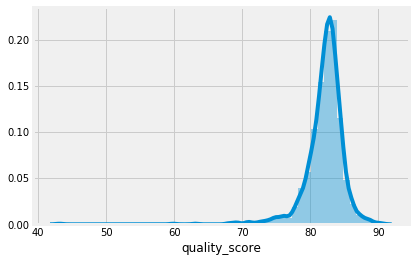

In [975]:
sns.distplot(arabica_sub['quality_score'])

In [976]:
true_pred.columns

Index(['quality_score', 'quality_score_pred'], dtype='object')

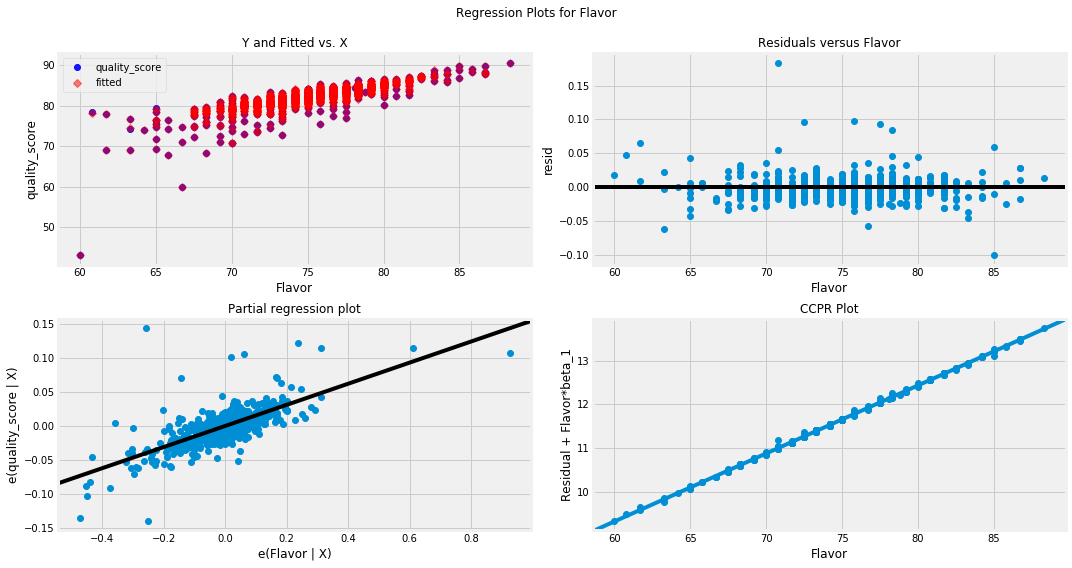

In [977]:
# plotting model with Flavor
fig1 = plt.figure(figsize=(15,8))
fig1 = sm.graphics.plot_regress_exog(dummy_model1, "Flavor", fig=fig1)
plt.show()

In [ ]:
# plotting model with Aroma
fig2 = plt.figure(figsize=(15,8))
fig2 = sm.graphics.plot_regress_exog(dummy_model1, "Aroma", fig=fig2)
plt.show()

In [ ]:
# residuals of 1st model
resid1 = dummy_model1.resid

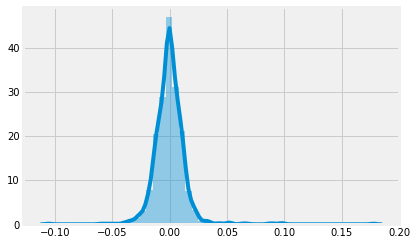

In [978]:
# histogram of residuals of 1st model
sns.distplot(resid1)

/Users/A/anaconda3/envs/Flatiron/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


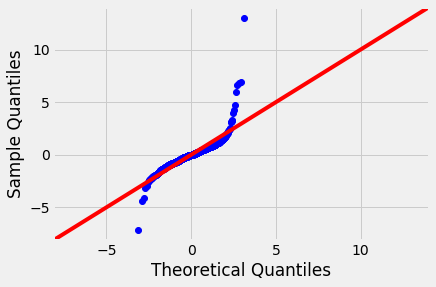

In [979]:
plt.style.use('fivethirtyeight')

resid1 = dummy_model1.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True,   )
fig.show()

In [980]:
# residuals of 2nd model
resid2 = dummy_model2.resid

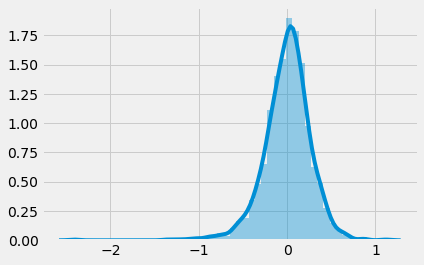

In [981]:
# histogram of residuals of 2nd model
sns.distplot(resid2)

/Users/A/anaconda3/envs/Flatiron/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


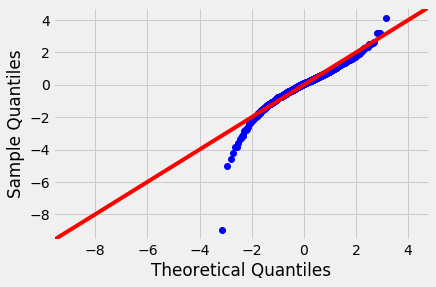

In [982]:
plt.style.use('fivethirtyeight')

resid2 = dummy_model2.resid
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True,   )
fig.show()